<h1>Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [18]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X,V):
        result += np.dot(matrix, vector)
    return result


def test1():
    matrices = [
        np.array([[1, 2], [3, 4]]), 
        np.array([[2, 0], [1, 2]])
    ]
    vectors = [
        np.array([[1], [1]]), 
        np.array([[2], [3]])
    ]
    exp_result = np.array([[7], [15]])

    assert np.array_equal(sum_prod(matrices, vectors), exp_result), "Тест не пройден"
    print("Тест 1 пройден")


def test2():
    matrix = [np.array([[1, 2], [3, 4]])]
    vector = [np.array([[1], [1]])]
    exp_result = np.array([[3], [7]])

    assert np.array_equal(sum_prod(matrix, vector), exp_result), "Тест не пройден"
    print("Тест 1 пройден")

test1()
test2()
    

Тест 1 пройден
Тест 1 пройден


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)


def test1():
    M = np.array([[1, 2, 3], [0, 1, 0], [7, 8, 9]])
    exp_result = np.array([[1, 1, 1], [0, 1, 0], [1, 1, 1]])

    assert np.array_equal(binarize(M), exp_result), "Тест 1 не пройден"
    print("Тест 1 пройден")

def test2():
    M = np.array([[ 1,  0,  3], [-1,  5,  2], [ 4,  0, -2]])
    exp_result = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]])

    assert np.array_equal(binarize(M, 3), exp_result), "Тест 2 не пройден"
    print("Тест 2 пройден")

test1()
test2()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [21]:
def unique_rows(mat):
    row = [np.unique(row) for row in mat]
    return row

def unique_columns(mat):
    column = [np.unique(column) for column in mat.T]
    return column


def test():
    mat = np.array([[1, 2, 2], [3, 3, 3], [4, 5, 2]])
    exp_rows = [np.array([1, 2]), np.array([3]), np.array([2, 4, 5])]

    assert all(np.array_equal(u, v) for u, v in zip(unique_rows(mat), exp_rows)), "Тест уникальных строк не пройден"
    print("Тест строк пройден")

    exp_cols = [np.array([1, 3, 4]), np.array([2, 3, 5]), np.array([2, 3])]
    assert all(np.array_equal(u, v) for u, v in zip(unique_columns(mat), exp_cols)), "Тест уникальных столбцов не пройден"
    print("Тест столбцов пройден")

test()

Тест строк пройден
Тест столбцов пройден


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

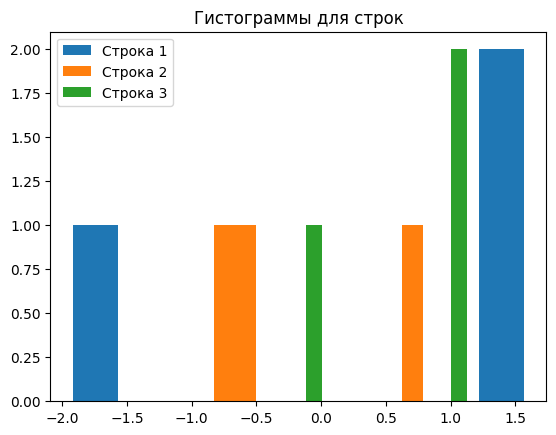

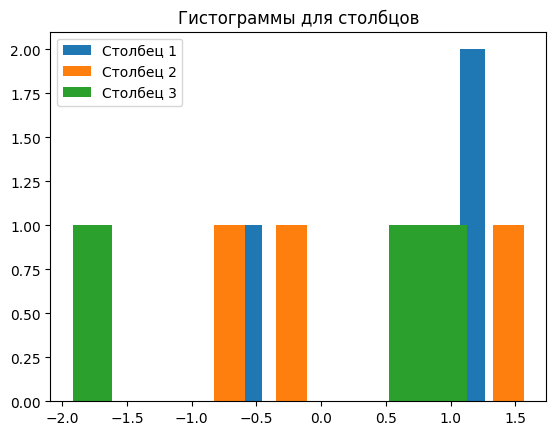

Матрица:
[[ 1.26705075  1.5671893  -1.91773426]
 [-0.64581074 -0.82854106  0.78937702]
 [ 1.1173989  -0.1209062   1.13029986]]
Мат ожидания строк: [ 0.30550193 -0.22832493  0.70893085]
Мат ожидания столбцов: [0.5795463  0.20591401 0.00064754]
Дисперии строк: [2.48640343 0.52342369 0.34434251]
Дисперсии столбцов: [0.75448256 1.00999305 1.85946576]


In [22]:
def fill_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    row_mat_expectation = np.mean(matrix, axis=1)
    column_mat_expectation = np.mean(matrix, axis=0)
    row_dispersion = np.var(matrix, axis=1)
    column_dispersion = np.var(matrix, axis=0)

    for i in range(m):
        plt.hist(matrix[i], label=f"Строка {i + 1}")
    plt.title('Гистограммы для строк')
    plt.legend()
    plt.show()

    transponsed_matrix = np.transpose(matrix)
    for i in range(n):
        plt.hist(transponsed_matrix[i], label=f"Столбец {i + 1}")
    plt.title('Гистограммы для столбцов')
    plt.legend()
    plt.show()

    return matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion

matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion = fill_matrix(3, 3)

print(f"Матрица:\n{matrix}")
print(f"Мат ожидания строк: {row_mat_expectation}")
print(f"Мат ожидания столбцов: {column_mat_expectation}")
print(f"Дисперии строк: {row_dispersion}")
print(f"Дисперсии столбцов: {column_dispersion}")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
def chess(m, n, a, b):
    """a - 'чёрные поля', b - 'белые поля'"""

    mat = np.zeros((m, n), dtype=int)

    mat[::2, ::2] = a
    mat[1::2, 1::2] = a
    mat[::2, 1::2] = b
    mat[1::2, ::2] = b
    
    return mat


def chess_test():
    m, n = 3, 3
    a, b = 1, 0
    expected_matrix = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    assert np.array_equal(chess(m, n, a, b), expected_matrix), "Тест 1 не пройден"
    print("Тест 1 пройден")

chess_test()

Тест 1 пройден


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


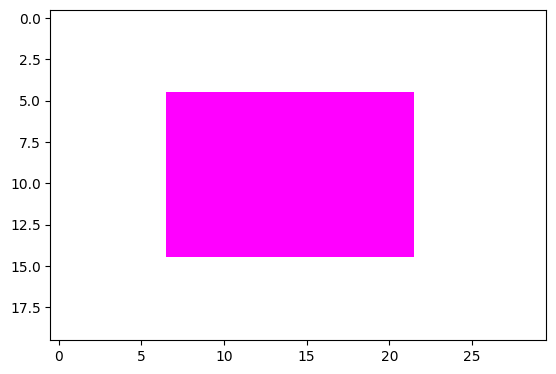

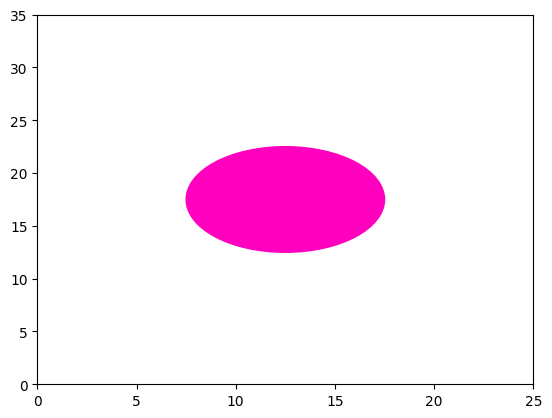

In [8]:
import matplotlib.patches as patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  rect_img = np.zeros((n, m, 3))
  rect_img[:, :] = background_color
  x0 = (m - a) // 2
  y0 = (n - a) // 1
  x1 = x0 + a
  y1 = y0 + b
  rect_img[y0:y1, x0:x1] = rectangle_color
  plt.imshow(rect_img)
  plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    ax = plt.axes()
    ax.set_facecolor(background_color)
    plt.xlim([0, m])
    plt.ylim([0, n])
    ellipse_color = np.array(ellipse_color) / 255.0
    background_color = np.array(background_color) / 255.0
    ellipse = patches.Ellipse((m / 2, n / 2), a, b, linewidth=1, color=ellipse_color)
    ax.add_patch(ellipse)

    plt.show()

draw_rectangle(15, 10, 30, 20, (255, 0, 190), (23, 23, 23))
draw_ellipse(10, 10, 25, 35, (255, 0, 190), (1, 1, 1))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
from scipy.signal import argrelextrema

def time_series(series, p):
  mean_series = np.mean(series)
  var_series = np.var(series)
  std_series = np.std(series)

  max_series_ind = argrelextrema(series, np.greater)[0]
  max_series = series[max_series_ind]
  min_series_ind = argrelextrema(series, np.less)[0]
  min_series = series[min_series_ind]

  p_series = np.ones(p) / p
  smoothed_series = np.convolve(series, p, mode='same')

  return mean_series, var_series, std_series, max_series, min_series, smoothed_series

series = np.array([14, 4, 5, 7, 1, 9, 13, 4, 22, 6, 19])
mean, variance, std_dev, max_indices, min_indices, smoothed = time_series(series, 2)
print("Среднее:", mean)
print("Дисперсия:", variance)
print("Стандартное отклонение:", std_dev)
print("Локальные максимумы:", max_indices)
print("Локальные минимумы:", min_indices)
print("Сглаженный ряд:", smoothed)

Среднее: 9.454545454545455
Дисперсия: 40.97520661157024
Стандартное отклонение: 6.40118790628507
Локальные максимумы: [ 7 13 22]
Локальные минимумы: [4 1 4 6]
Сглаженный ряд: [28  8 10 14  2 18 26  8 44 12 38]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
def one_hot_encode(vector, num_classes):
    encoded = np.zeros((len(vector), num_classes))
    for i in range(len(vector)):
      encoded[i, vector[i]] = 1
    return encoded

vector = [0, 2, 3, 0]
num_classes = 4
print(one_hot_encode(vector, num_classes))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
